In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"D:\DM\Predictive maintenance\ai4i2020.csv")

In [3]:
df_sample = df.sample(n=500, random_state=42).reset_index(drop=True)


In [4]:
# Add missing value in numberic cols
missing_cols = ['Air temperature [K]', 'Torque [Nm]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Tool wear [min]']
for col in missing_cols:
    idx_missing = df_sample.sample(frac=0.08, random_state=42).index
    df_sample.loc[idx_missing, col] = np.nan

In [5]:
outlier_cols = ['Process temperature [K]', 'Rotational speed [rpm]', 'Tool wear [min]', 'Torque [Nm]']
for col in outlier_cols:
    idx_outliers = df.sample(frac=0.04, random_state=42).index
    df.loc[idx_outliers, col] = df[col].max() * 2

In [6]:
# Thêm lỗi cột Type
cat_error_idx = df_sample.sample(5, random_state=1).index
df_sample.loc[cat_error_idx, 'Type'] = ['h', 'm', 'L ', '??', 'HIGH']


In [7]:
# Lưu file
df_sample.to_csv("dirty_sample_500.csv", index=False)



In [8]:
df1 = pd.read_csv('dirty_sample_500.csv')

In [9]:
df1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,6253,L53432,L,300.8,310.3,1538.0,36.1,198.0,0,0,0,0,0,0
1,4685,M19544,M,303.6,311.8,1421.0,44.8,101.0,1,0,0,0,0,0
2,1732,M16591,M,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,4743,L51922,L,303.3,311.3,1592.0,33.7,14.0,0,0,0,0,0,0
4,4522,L51701,L,302.4,310.4,1865.0,23.9,129.0,0,0,0,0,0,0


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      500 non-null    int64  
 1   Product ID               500 non-null    object 
 2   Type                     500 non-null    object 
 3   Air temperature [K]      460 non-null    float64
 4   Process temperature [K]  460 non-null    float64
 5   Rotational speed [rpm]   460 non-null    float64
 6   Torque [Nm]              460 non-null    float64
 7   Tool wear [min]          460 non-null    float64
 8   Machine failure          500 non-null    int64  
 9   TWF                      500 non-null    int64  
 10  HDF                      500 non-null    int64  
 11  PWF                      500 non-null    int64  
 12  OSF                      500 non-null    int64  
 13  RNF                      500 non-null    int64  
dtypes: float64(5), int64(7), o

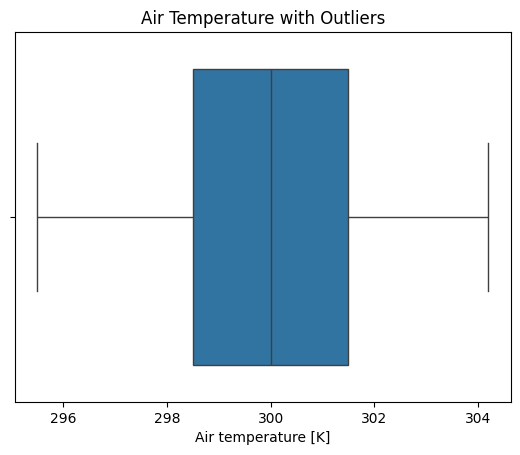

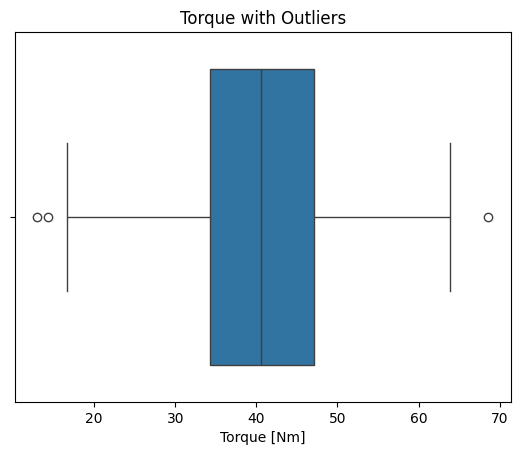

In [11]:
import matplotlib.pyplot as plt

sns.boxplot(x=df_sample['Air temperature [K]'])
plt.title("Air Temperature with Outliers")
plt.show()

sns.boxplot(x=df_sample['Torque [Nm]'])
plt.title("Torque with Outliers")
plt.show()


In [12]:
print(df_sample['Type'].unique())


['L' 'M' 'H' 'L ' '??' 'h' 'm' 'HIGH']


In [13]:
df_sample['Type'].value_counts()

Type
L       320
M       133
H        42
L         1
??        1
h         1
m         1
HIGH      1
Name: count, dtype: int64

In [14]:
print(df['Machine failure'].value_counts(normalize=True))

Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64
